## Observations and Insights 

In [203]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

In [2]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
total_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
total_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
number_mice = total_data["Mouse ID"].unique()
number_mice = len(number_mice)
print(f"Number of Mice: {number_mice}")

Number of Mice: 249


In [6]:
# Getting the Mouse ID numbers that show up with duplicate Timepoints. 
total_data["Duplicate"] = total_data.duplicated(subset=["Mouse ID","Timepoint"],keep=False)
duplicates = total_data.loc[total_data["Duplicate"] == True]

In [7]:
# Optional: Display all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [8]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.
cleaned_total_data = pd.DataFrame()
cleaned_total_data = total_data[total_data["Mouse ID"] != "g989"]
cleaned_total_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [9]:
# Checking the number of mice in the clean DataFrame.
number_mice_two = cleaned_total_data["Mouse ID"].unique()
number_mice_two = len(number_mice_two)
print(f"Number of Mice: {number_mice_two}")

Number of Mice: 248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the \
# tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouped_data = pd.DataFrame()
grouped_data = cleaned_total_data.groupby(["Drug Regimen"])
summary_stats = pd.DataFrame()
summary_stats["Mean"] = round(grouped_data["Tumor Volume (mm3)"].mean(),2)
summary_stats["Median"] = round(grouped_data["Tumor Volume (mm3)"].median(),2)
summary_stats["Variance"] = round(grouped_data["Tumor Volume (mm3)"].var(),2) 
summary_stats["Std. Dev."] = round(grouped_data["Tumor Volume (mm3)"].std(),2)
summary_stats["Std. Error"] = round(grouped_data["Tumor Volume (mm3)"].sem(),2)
summary_stats

,Mean,Median,Variance,Std. Dev.,Std. Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_two = pd.DataFrame()
summary_stats_two = grouped_data.agg({'Tumor Volume (mm3)' : ['mean','median','var','std','sem']})
summary_stats_two.columns = ['Mean','Median','Variance','Std. Dev.','Std. Error']
summary_stats_two

,Mean,Median,Variance,Std. Dev.,Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

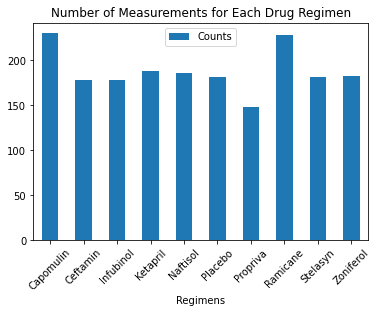

In [56]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_counts = grouped_data["Drug Regimen"].value_counts()
regimens = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane',
            'Stelasyn','Zoniferol']
counts = ['230','178','178','188','186','181','148','228','181','182']
bar = pd.DataFrame({"Regimens":['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'], "Counts":[230,178,178,188,186,181,148,228,181,182]})
bar["Regimens"] = bar["Regimens"].astype('string')
bar["Counts"] = bar["Counts"].astype('int64')
bar.plot.bar(x="Regimens", y="Counts", rot=45, title="Number of Measurements for Each Drug Regimen")

Text(0.5, 1.0, 'Number of Measurements for Each Drug Regimen')

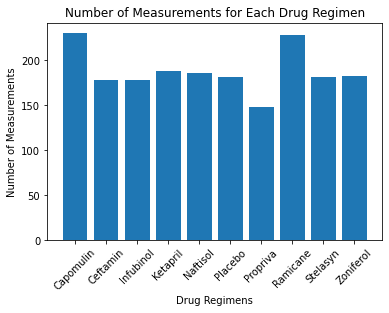

In [57]:
   # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(regimens, regimen_counts, align="center")
plt.xticks(rotation=45)
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")
plt.title("Number of Measurements for Each Drug Regimen")


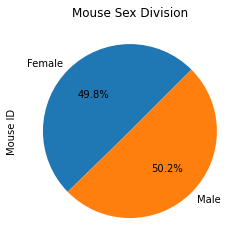

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = pd.DataFrame()
sex = mouse_metadata.drop_duplicates("Mouse ID")
sexes = ['Male','Female']
counts = sex["Sex"].value_counts()

sex_split = pd.DataFrame()
sex_split = sex.groupby(["Sex"]).count()
sex_split.plot.pie(y="Mouse ID", title ="Mouse Sex Division",sort_columns=True, startangle=45, legend=False,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x24f5d297780>,
 [Text(0.8470925369228766, -0.7017365844029833, 'Male'),
  Text(-0.8470925369228758, 0.7017365844029841, 'Female')],
 [Text(0.4620504746852053, -0.38276540967435446, '50.2%'),
  Text(-0.46205047468520494, 0.38276540967435496, '49.8%')])

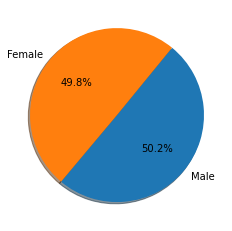

In [99]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(counts,labels=sexes,autopct='%1.1f%%',shadow=True,startangle=230)

## Quartiles, Outliers and Boxplots

In [172]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_tumor_volume = cleaned_total_data[(cleaned_total_data["Drug Regimen"] == "Capomulin") | (cleaned_total_data["Drug Regimen"] == "Ramicane") | (cleaned_total_data["Drug Regimen"] == "Infubinol") | (cleaned_total_data["Drug Regimen"] == "Ceftamin")]
final_tumor_volume = final_tumor_volume.sort_values("Timepoint", ascending = False)
final_tumor_volume.drop_duplicates(subset='Mouse ID', keep="first",inplace= True)
final_tumor_volume = final_tumor_volume.sort_values("Mouse ID")


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
9,k403,Ramicane,Male,21,16,45,22.050126,1,False
19,s185,Capomulin,Female,3,17,45,23.343598,1,False
39,m601,Capomulin,Male,22,17,45,28.430964,1,False
29,x401,Capomulin,Female,16,15,45,28.484033,0,False
49,g791,Ramicane,Male,11,16,45,29.128472,1,False
...,...,...,...,...,...,...,...,...,...
1112,l471,Ceftamin,Female,7,28,45,67.748662,1,False
463,a203,Infubinol,Female,20,23,45,67.973419,2,False
1845,y769,Ceftamin,Female,6,27,45,68.594745,4,False
1033,k210,Ceftamin,Male,15,28,45,68.923185,3,False


In [177]:
# Put treatments into a list for a for loop (and later for plot labels)
# Already had this from above so just printing it to make it easy and obvious.
print(f"List of Treatment Regimens: {regimens}")

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = cleaned_total_data["Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol_data.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25], 2)
upperq = round(quartiles[0.75], 2)
iqr = round(upperq-lowerq, 2)
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin = pd.DataFrame()
capomulin = final_tumor_volume[(final_tumor_volume["Drug Regimen"] == "Capomulin")]
ramicane = pd.DataFrame()
ramicane = final_tumor_volume[(final_tumor_volume["Drug Regimen"] == "Ramicane")]
infubinol = pd.DataFrame()
infubinol = final_tumor_volume[(final_tumor_volume["Drug Regimen"] == "Infubinol")]
ceftamin = pd.DataFrame()
ceftamin = final_tumor_volume[(final_tumor_volume["Drug Regimen"] == "Ceftamin")]
    
# Determine outliers using upper and lower bounds
potential_outliers = cleaned_total_data.loc[(cleaned_total_data["Tumor Volume (mm3)"] > upper_bound) | (cleaned_total_data["Tumor Volume (mm3)"] < lower_bound)]
potential_outliers

List of Treatment Regimens: ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
Values below 28.02 could be outliers.
Values above 73.3 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
1892,z969,Naftisol,Male,9,30,45,73.867845,4,False
679,c402,Stelasyn,Female,1,27,45,74.040390,3,False
567,a818,Naftisol,Female,12,28,45,74.997764,2,False
1043,k382,Ketapril,Male,22,29,45,73.715619,4,False
9,k403,Ramicane,Male,21,16,45,22.050126,1,False
1354,p189,Ketapril,Male,8,28,45,75.294936,4,False
1571,t724,Naftisol,Female,2,25,45,75.113288,2,False
19,s185,Capomulin,Female,3,17,45,23.343598,1,False
1277,o331,Ketapril,Male,24,30,45,78.567014,4,False
850,f545,Zoniferol,Female,20,26,45,73.324432,1,False


(0.0, 80.0)

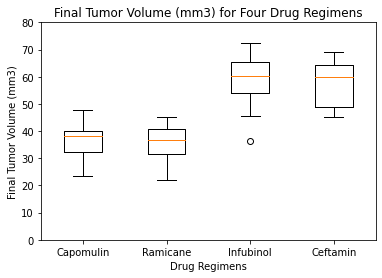

In [183]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
xlabels = ['Capomulin','Ramicane','Infubinol','Ceftamin']
data = [capomulin["Tumor Volume (mm3)"],ramicane["Tumor Volume (mm3)"],infubinol["Tumor Volume (mm3)"],ceftamin["Tumor Volume (mm3)"]]
plt.boxplot(data, labels=xlabels)
plt.xlabel("Drug Regimens")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume (mm3) for Four Drug Regimens")
plt.ylim(0, 80)



## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

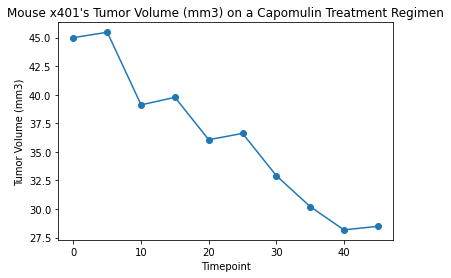

In [193]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = pd.DataFrame()
# Isolates a random mouse I picked that fits the requirements.
capomulin_mouse = cleaned_total_data.loc[(cleaned_total_data["Drug Regimen"] == "Capomulin") & (cleaned_total_data["Mouse ID"] == "x401")]
plt.plot(capomulin_mouse["Timepoint"],capomulin_mouse["Tumor Volume (mm3)"], marker='o')
plt.title("Mouse x401's Tumor Volume (mm3) on a Capomulin Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

Text(0, 0.5, 'Tumor Volume (mm3)')

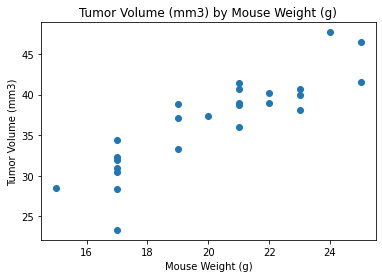

In [201]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avgs = pd.DataFrame()
capomulin_avgs = capomulin.mean()
capomulin_avgs
plt.scatter(capomulin["Weight (g)"],capomulin["Tumor Volume (mm3)"])
plt.title("Tumor Volume (mm3) by Mouse Weight (g)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [213]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, intercept, rvalue, pvalue, std_err = stats.linregress(capomulin["Weight (g)"],capomulin["Tumor Volume (mm3)"])
equation = (f"y = {round(slope, 2)}x + {round(intercept, 2)}")

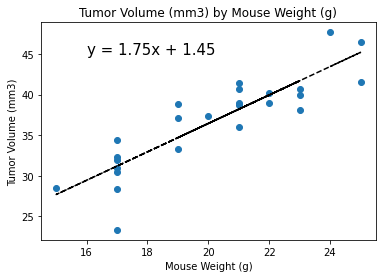

In [221]:
plt.scatter(capomulin["Weight (g)"],capomulin["Tumor Volume (mm3)"])
plt.title("Tumor Volume (mm3) by Mouse Weight (g)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.annotate(equation, (16, 45), fontsize = 15)
plt.plot(capomulin["Weight (g)"], (capomulin["Weight (g)"]*slope+intercept), "--", color = 'black')